### CLUSTERING ALGORITHMS - K-MEANS AND HIERARCHICAL CLUSTERING

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris

iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# We need only the data part. 
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### No NULL values found

#### Identify and remove Duplicates

In [7]:
# Check for any duplicate values
iris_df.duplicated().sum()

1

In [9]:
iris_df.drop_duplicates(inplace = True)

hr_iris_df = iris_df.copy() 
iris_df.shape

(149, 4)

#### Checking and handling Outliers

In [11]:
iris_df.skew()

sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64

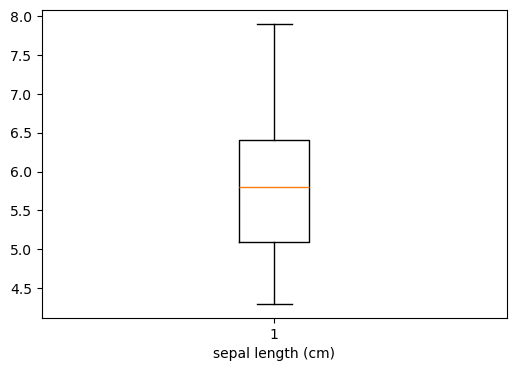

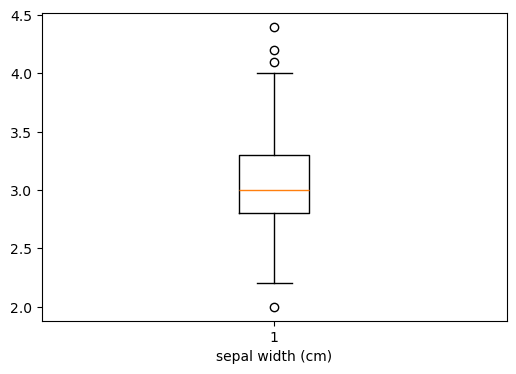

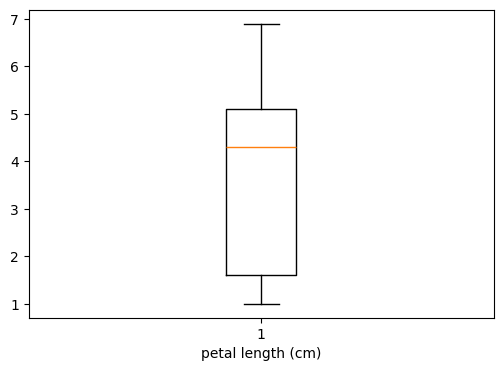

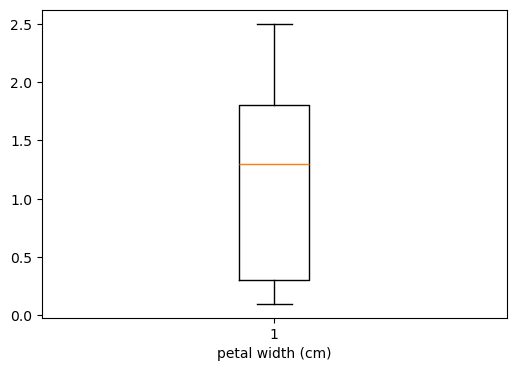

In [13]:
for columns in iris_df.columns:
    plt.figure(figsize=(6,4))
    plt.boxplot(iris_df[columns])
    plt.xlabel(columns)
    plt.show()

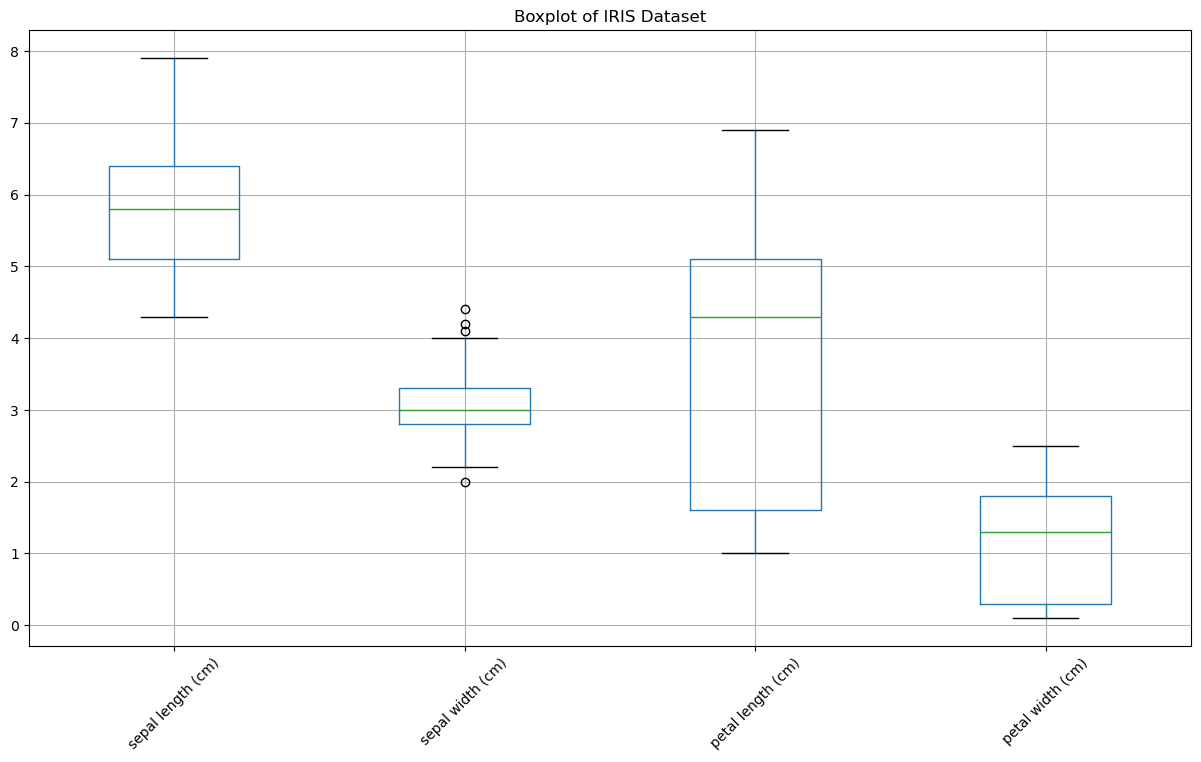

In [15]:
plt.figure(figsize=(15, 8))
iris_df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of IRIS Dataset")
plt.show()

#### Normalizing using Standard Deviation

In [17]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(iris_df)

# Converting the set to Dataframe
X = pd.DataFrame(X, columns = iris.feature_names)
print('\tStandard Scaled Dataset \n' , X)

X1 = X.copy()  # Saving a copy of the dataframe for Hierarchichal Method

	Standard Scaled Dataset 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.898033          1.012401          -1.333255         -1.308624
1            -1.139562         -0.137353          -1.333255         -1.308624
2            -1.381091          0.322549          -1.390014         -1.308624
3            -1.501855          0.092598          -1.276496         -1.308624
4            -1.018798          1.242352          -1.333255         -1.308624
..                 ...               ...                ...               ...
144           1.034197         -0.137353           0.823571          1.454321
145           0.551140         -1.287108           0.710054          0.928046
146           0.792668         -0.137353           0.823571          1.059614
147           0.430375          0.782450           0.937088          1.454321
148           0.068082         -0.137353           0.766812          0.796477

[149 rows x 4 columns]


#### Dimensionality Reduction

##### Need to reduce the features to 2 because we need to show 2D plots 

In [19]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2) # reducing from 4 features to 2 
X = pca.fit_transform(X)

# Coverting the set to Dataframe
X = pd.DataFrame(X, columns = ['col-1','col-2'])  # Reduced Cols renamed as Col-1 and Col-2
print('\tDimensionality Reduction Dataset \n' , X)

	Dimensionality Reduction Dataset 
         col-1     col-2
0   -2.252692  0.479299
1   -2.071004 -0.674234
2   -2.353147 -0.340442
3   -2.288762 -0.595441
4   -2.377294  0.646885
..        ...       ...
144  1.876052  0.378388
145  1.568516 -0.904008
146  1.527018  0.261268
147  1.380471  1.006405
148  0.967174 -0.028595

[149 rows x 2 columns]


### 1. K_Means Clustering

#### How K-Means Clustering Works
##### 1. Choose a number of clusters, or K
##### 2. Randomly select K centroids, or representative values, for each cluster
##### 3. Assign each data point to the nearest centroid
##### 4. Recalculate the centroids based on the new groupings
##### 5. Repeat steps 3 and 4 until the centroids stop moving much

#### Why it is Suitable for IRIS Dataset?
##### K-Means Clustering is suitable for small and large unsupervised Datasets and it works on patterns. As IRIS Dataset has 149 rows, its a small Dataset and so the algorithm is suitable for this kind of dataset. In K-Means clustering, we need to specify the number of clusters manually. So knowledge on dataset is required here. 

#### RUNNING WITH DIFFERENT K-VALUES OR CLUSTERS

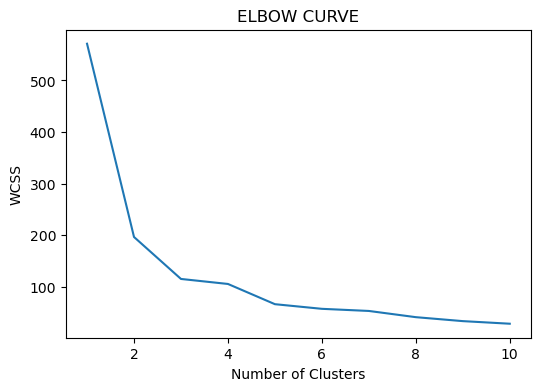

In [21]:
from sklearn.cluster import KMeans
num_of_clusters = range(1,11)
kmeans = [KMeans(n_clusters=i) for i in num_of_clusters]
kmeans
wcss = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
wcss
plt.figure(figsize=(6,4))
plt.plot(num_of_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Square values
plt.title('ELBOW CURVE')
plt.show()

### from this Elbow Curve, the curve seems elbow at 3

In [23]:
from sklearn.cluster import KMeans
#clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters =3, n_init = 18)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 0 2 2
 0]


In [25]:
k_means.cluster_centers_

array([[ 0.56705167, -0.81394257],
       [-2.2130293 ,  0.28878187],
       [ 1.72691017,  0.59331746]])

In [27]:
# EVALUATING THE MODEL
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.5093969608940436

### INSIGHTS

In [29]:
iris_df['Cluster_as_per_KMeans'] = labels
iris_df.head(60)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_as_per_KMeans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


Checking the centroid values by averaging the features in each cluster

In [31]:
iris_df.groupby('Cluster_as_per_KMeans').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster_as_per_KMeans,,,,
0,5.801923,2.673077,4.355769,1.403846
1,5.006000,3.428000,1.462000,0.246000
2,6.780851,3.095745,5.510638,1.972340


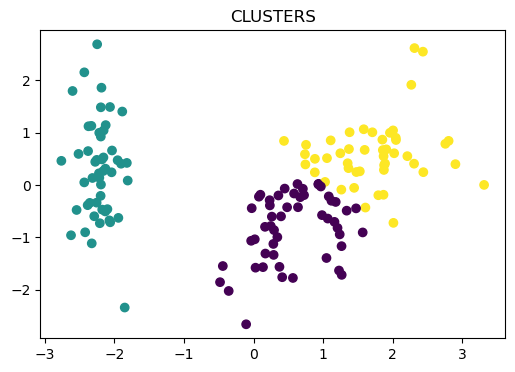

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(X['col-1'], X['col-2'], c=labels )
plt.title('CLUSTERS')
plt.show()

### 2. Hierarchical Clustering 

#### How Agglomerative clustering works -
##### Agglomerative clustering is a bottom-up approach. 
##### It starts clustering by treating the individual data points as a single cluster, then it is merged continuously based on similarity until it forms one big cluster containing all objects

#### Why it is Suitable for IRIS Dataset?
##### Hierarchical Clustering is suitable for small Datasets. If the Dataset is huge, it is very time consuming and difficult for this type of Clustering. As IRIS Dataset has 149 rows, its a small Dataset and so the algorithm is suitable for this kind of dataset. Also here we need not specify the number of clusters in advance, it calculates the number of clusters by itself. (In K-Means clustering, we need to specify the number of clusters manually)

In [35]:
X1_copy = X1.copy() 
X1 = X1_copy.copy()
X1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [37]:
from sklearn.cluster import AgglomerativeClustering
agcl = AgglomerativeClustering()
X1['cluster']=agcl.fit_predict(X1)
X1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,-0.898033,1.012401,-1.333255,-1.308624,1
1,-1.139562,-0.137353,-1.333255,-1.308624,1
2,-1.381091,0.322549,-1.390014,-1.308624,1
3,-1.501855,0.092598,-1.276496,-1.308624,1
4,-1.018798,1.242352,-1.333255,-1.308624,1
...,...,...,...,...,...
144,1.034197,-0.137353,0.823571,1.454321,0
145,0.551140,-1.287108,0.710054,0.928046,0
146,0.792668,-0.137353,0.823571,1.059614,0
147,0.430375,0.782450,0.937088,1.454321,0


In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
z = linkage(X1,method='ward')
lab = X.index.to_list()

dendrogram(z,labels=lab,leaf_rotation=90)

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [14.375, 14.375, 71.25, 71.25],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [142.5, 142.5, 180.0, 180.0],
  [112.5, 112.5, 161.25, 161.25],
  [42.8125, 42.8125, 136.875, 136.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [213.75, 213.75, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0,

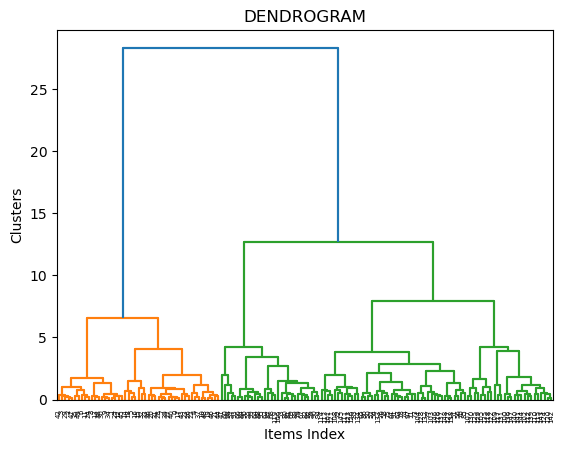

In [43]:
dendrogram(z,labels=lab,leaf_rotation=90)
#plt.figure(figsize=(30, 10))
plt.rcParams["figure.figsize"] = [12, 8]
plt.title('DENDROGRAM')
plt.xlabel("Items Index")
plt.ylabel('Clusters')

plt.show()

In [45]:

# import image module 
from IPython.display import Image 
  
# get the image 
Image(url="IRIS_Dendrogram.png", width=1000, height=1000) 